In [1]:
from default_values import *
import default_values
reload(default_values)

from functions_root_nparray import *
import functions_root_nparray
reload(functions_root_nparray)

from functions_correlations import *
import functions_correlations
reload(functions_correlations)

from functions_fragmentation import *
import functions_fragmentation
reload(functions_fragmentation)

import numpy as np
from numpy import geomspace
import math
import matplotlib
from cycler import cycler

import matplotlib.pyplot as plt
%matplotlib inline

import ROOT

Welcome to JupyROOT 6.14/04
../InputData/zT_Rebin_8_006zT06zT13fnew/pp_SE_L0_Correlation_GMB_Ratio.root
['pp', 'p-Pb']
[[0.18152603]
 [0.11831406]]
../InputData/zT_Rebin_8_006zT06zT13fnew/pp_SE_L0_Correlation_GMB_Ratio.root
['pp', 'p-Pb']
[[0.18152603]
 [0.11831406]]


**root to numpy**

**Correlated Subtraction**: $C_S = \frac{C_{SR} \ \ - \ \ (1-p) C_{BR}}{p}$

**Pedestal Subtraction**

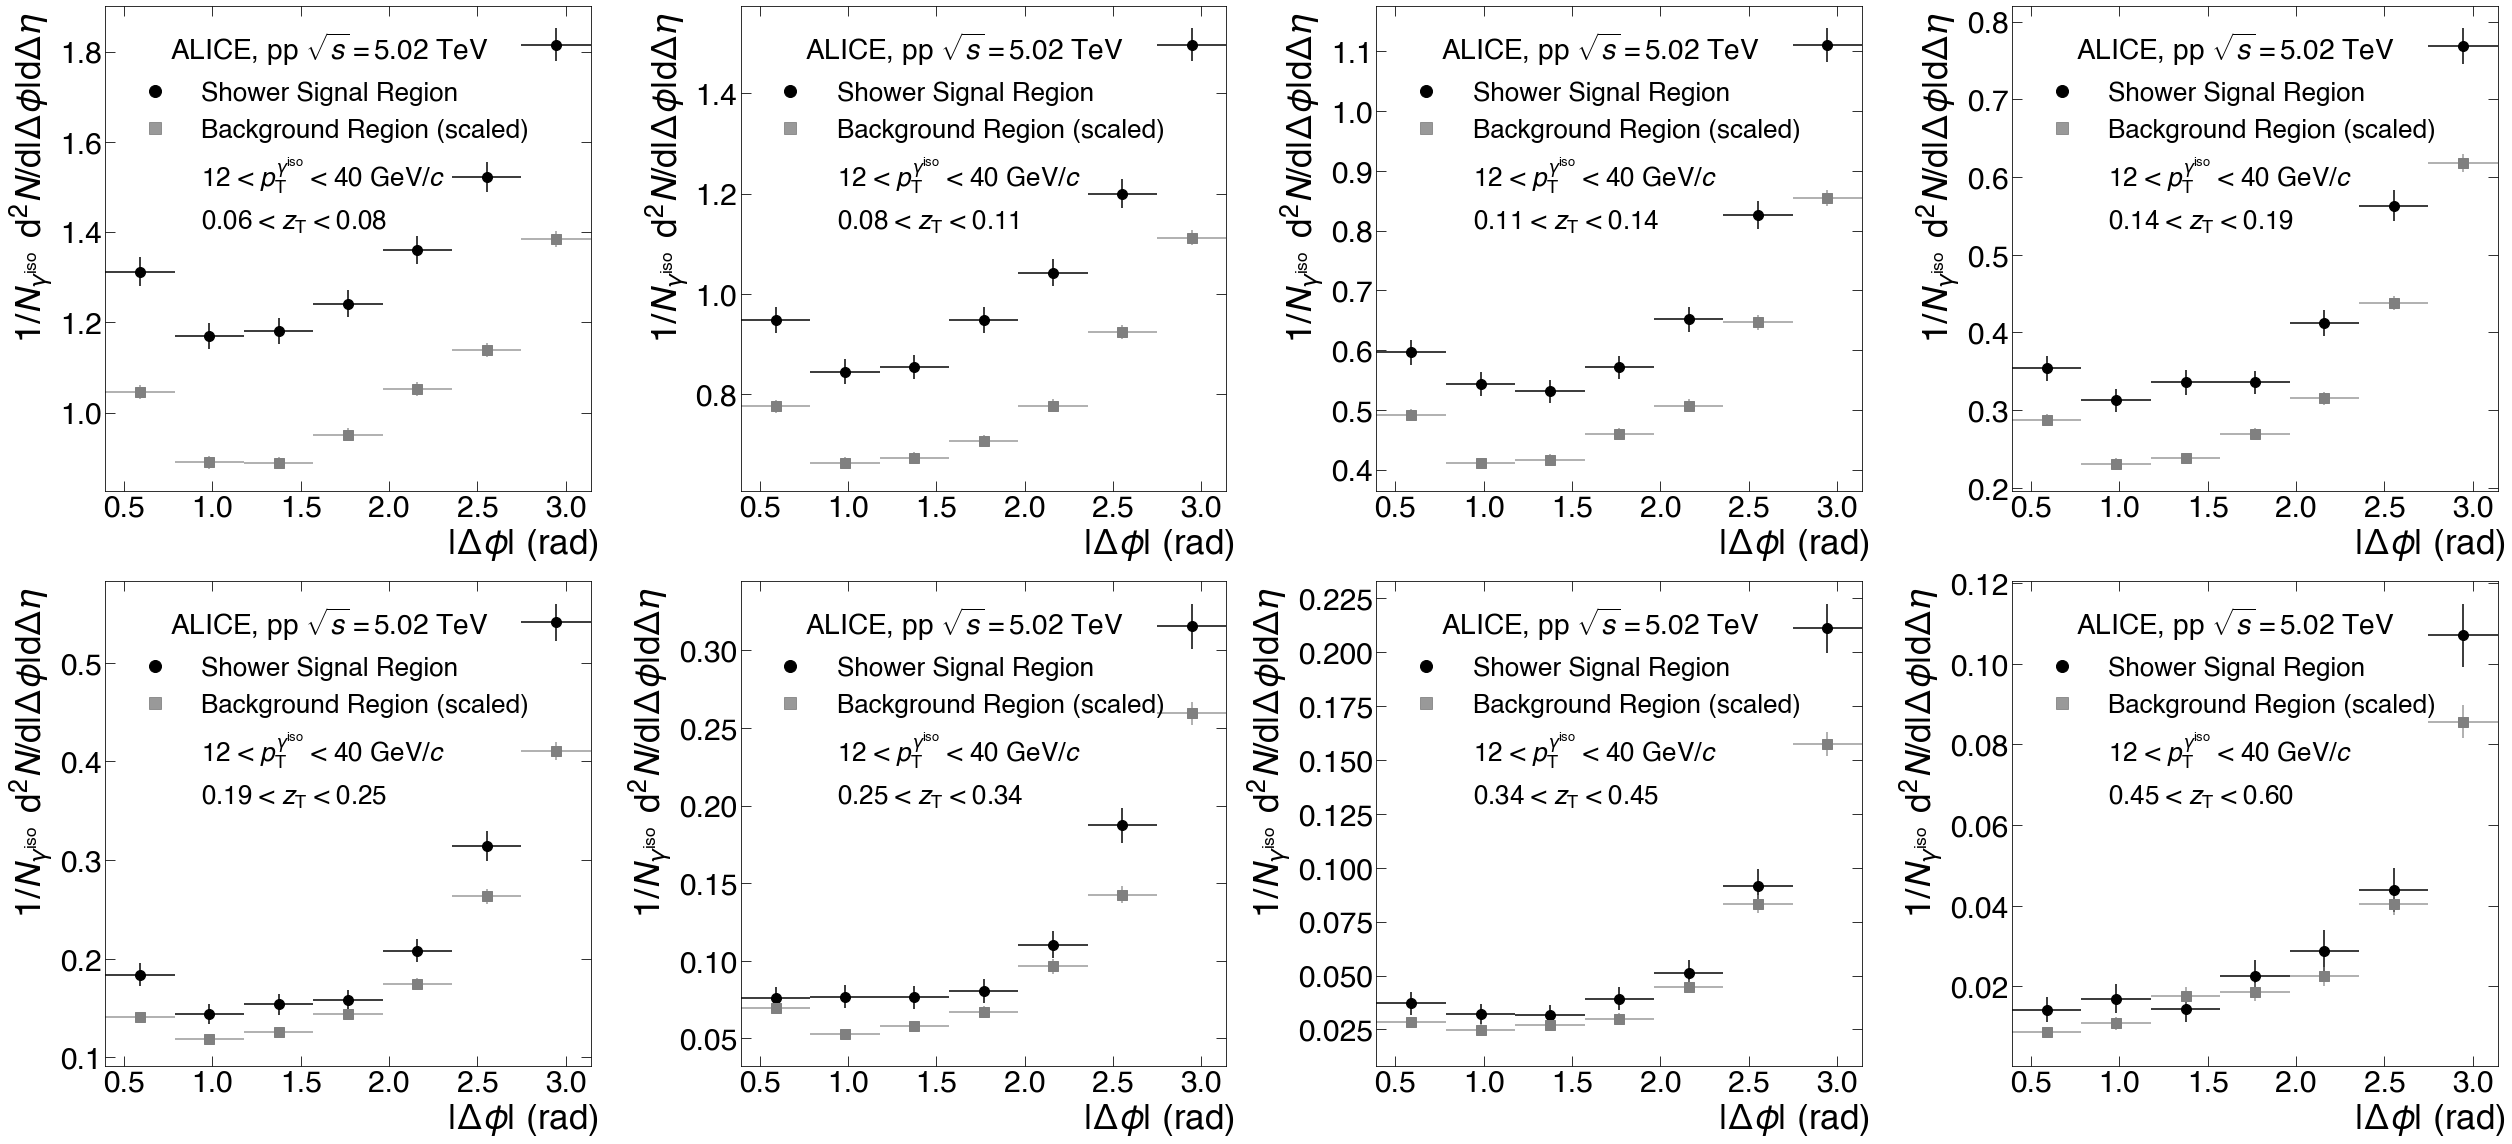

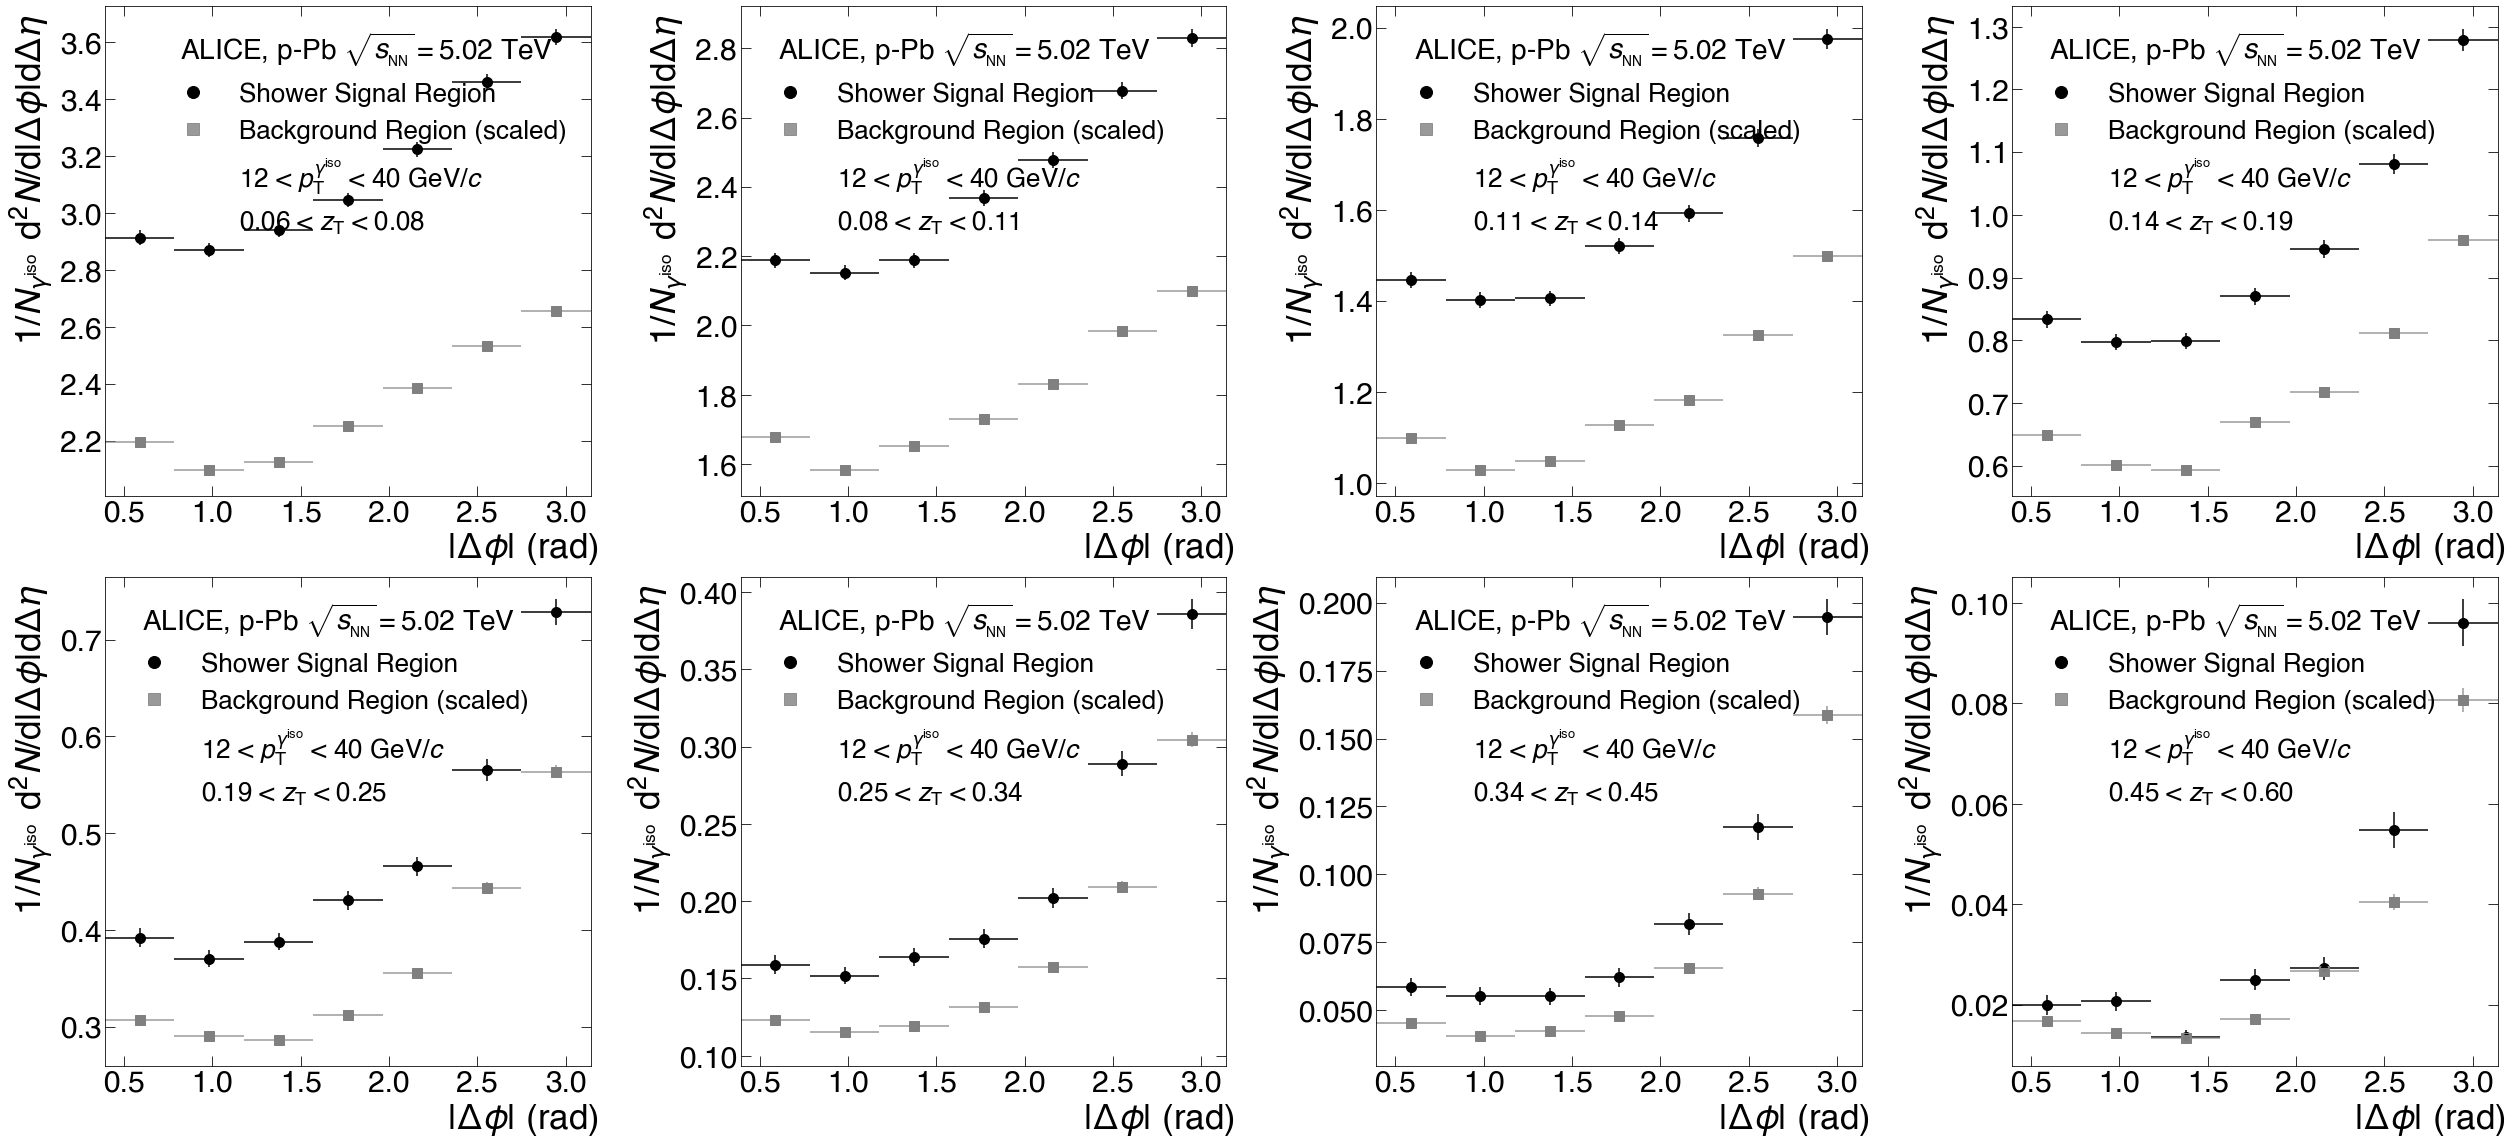

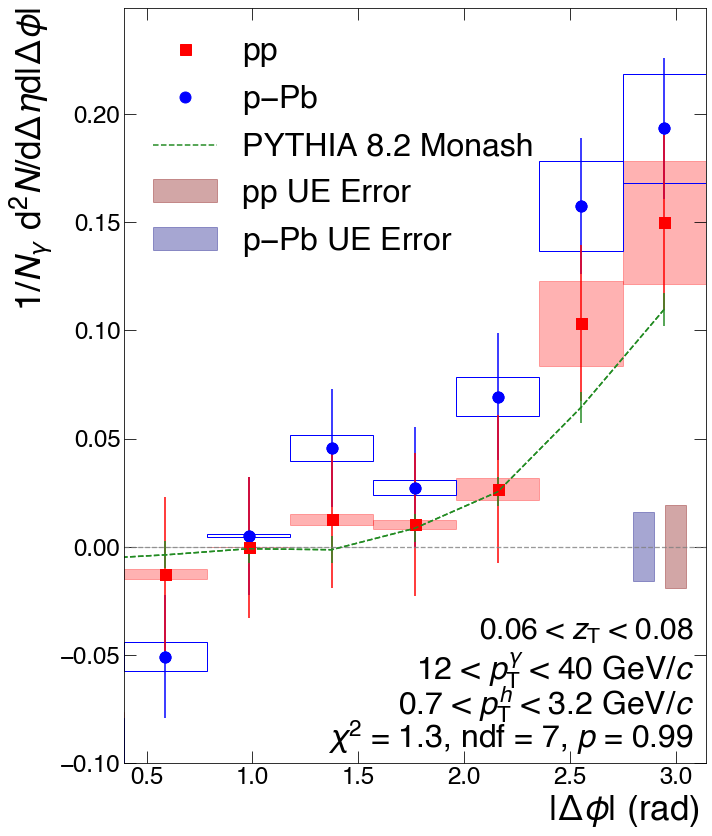

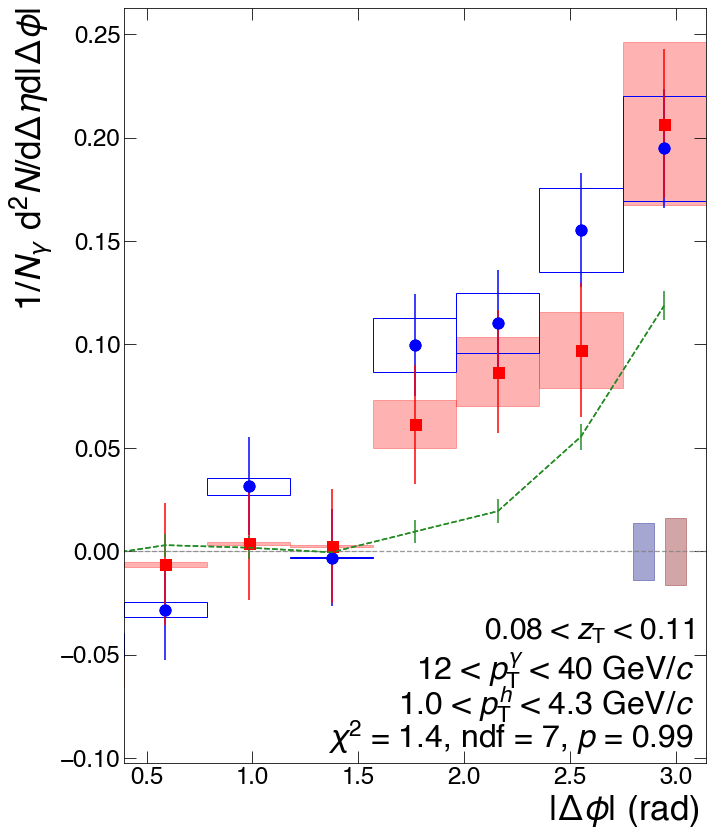

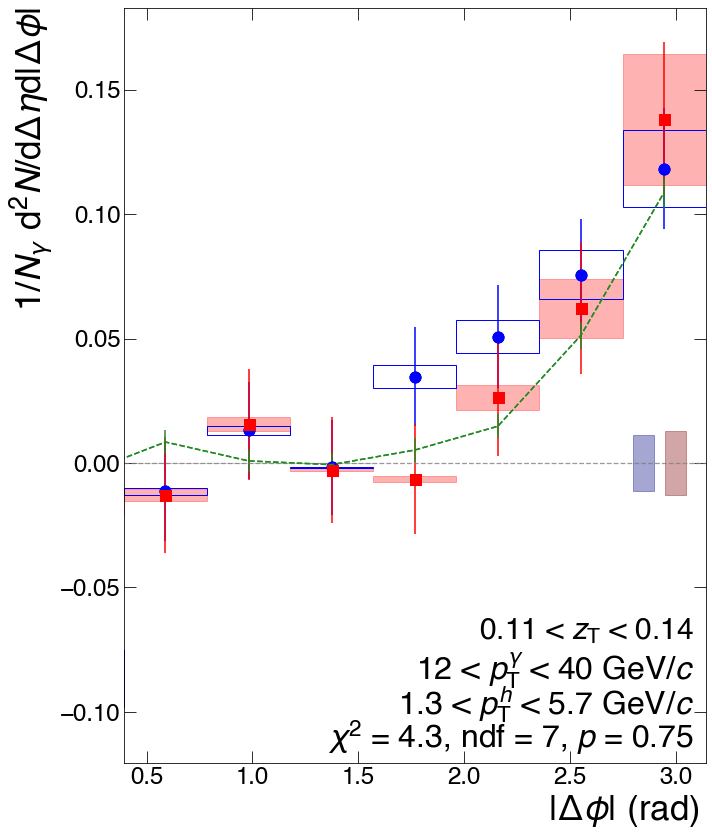

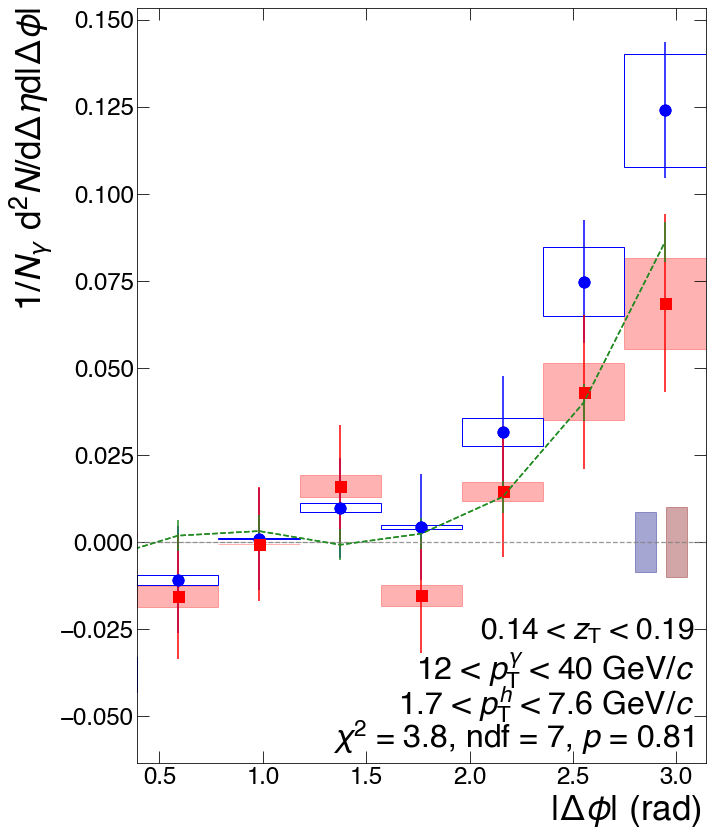

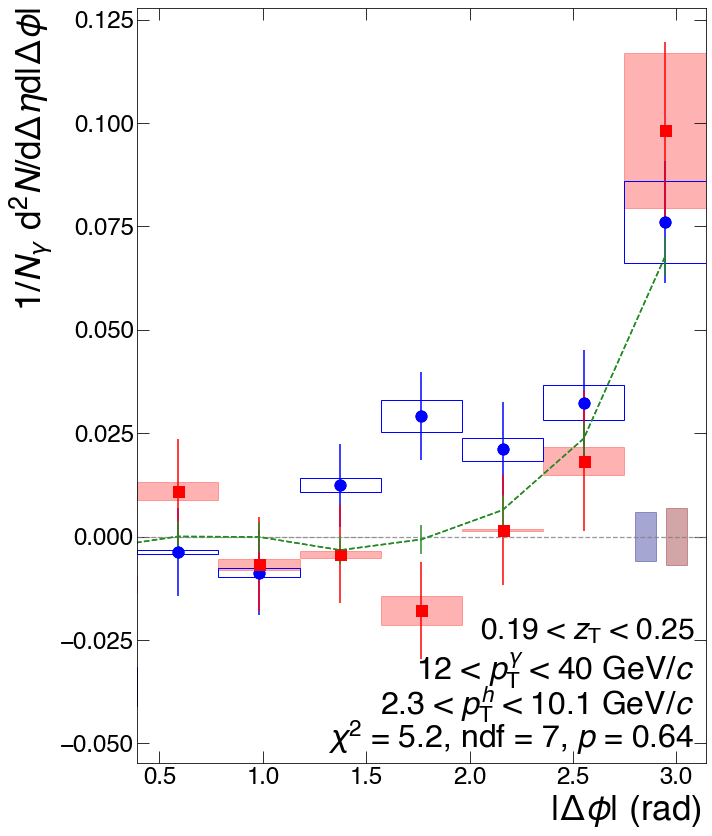

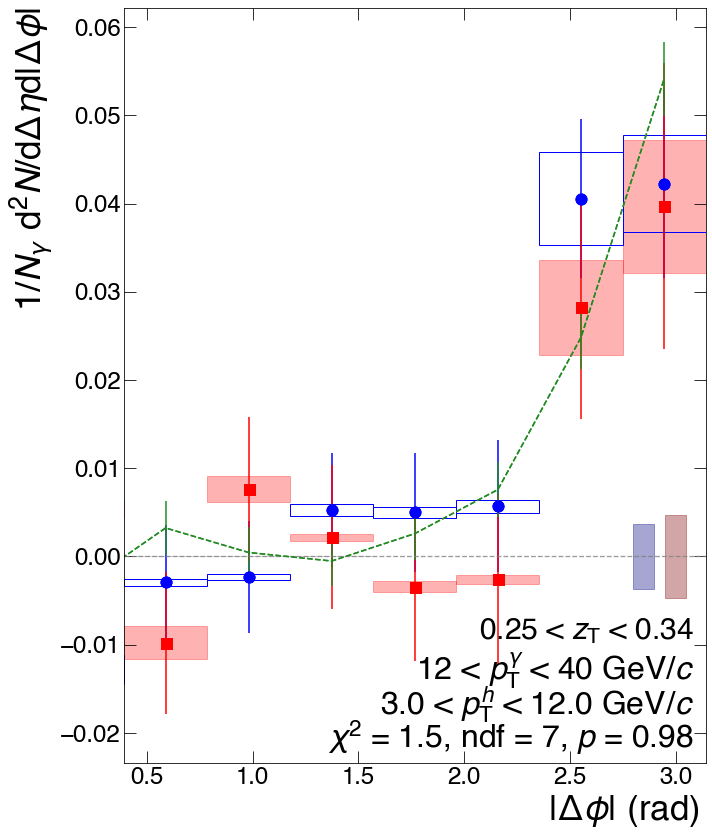

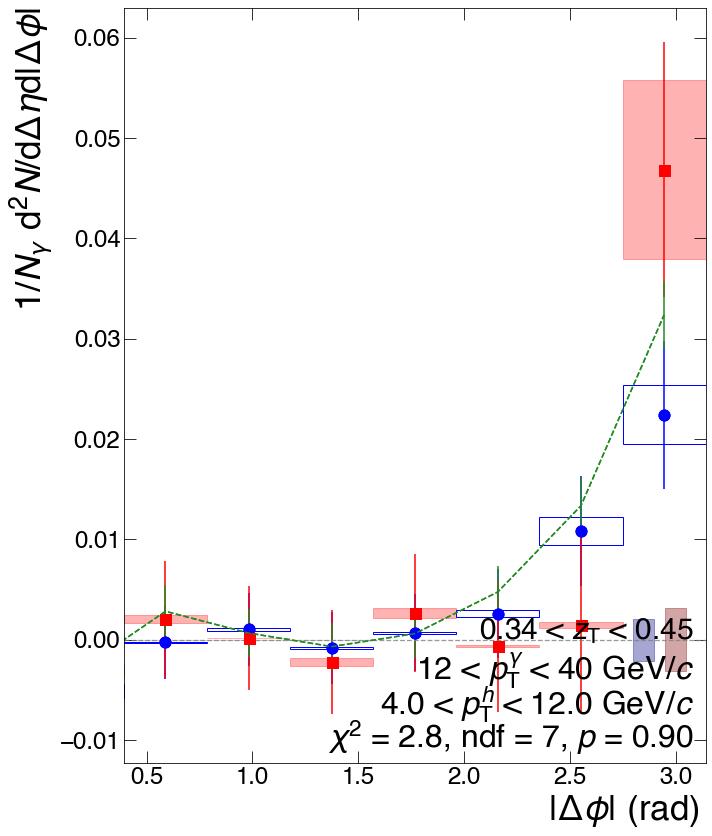

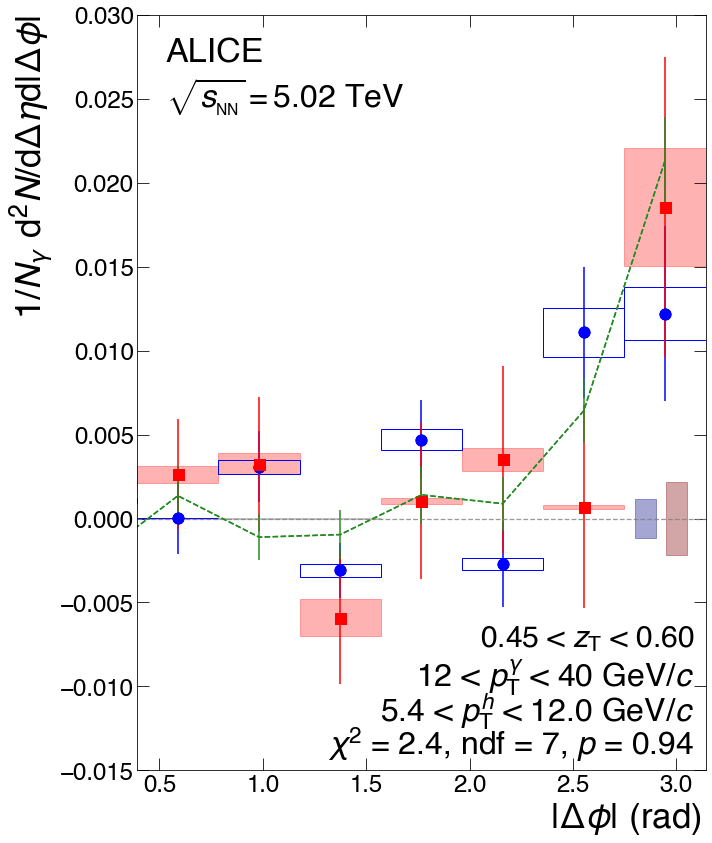

In [2]:
Corrs = ROOT_to_nparray()
Plot_Sub_UB_Overlay(Corrs)
Correlated_Subtraction_Weights(Corrs)
Ped_Sub_After_Cs(Corrs)
Plot_pp_pPb_Cs_Individual(Corrs)

In [3]:
reload(functions_correlations)
reload(functions_correlations)
from functions_correlations import *

In [4]:
Frags = Get_Fragmentation(Corrs)
#LaTeX_Results_Summary(Frags)
#LaTeX_Ratio_Systematics(Frags)

In [5]:
reload(functions_fragmentation)
from functions_fragmentation import *

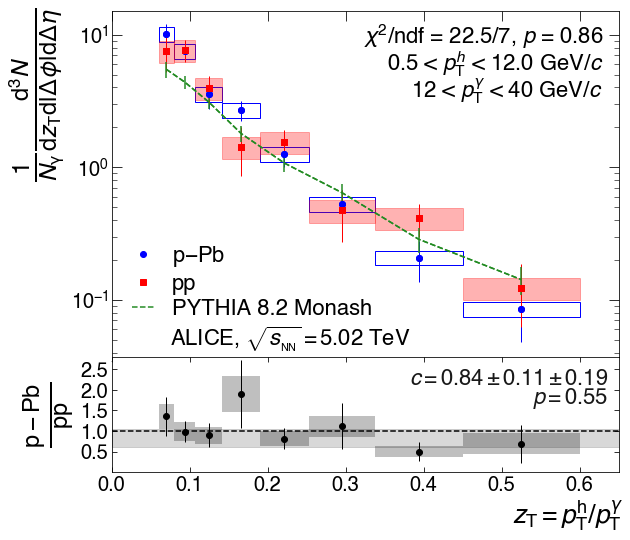


****************************************
Minimizer is Linear
Chi2                      =      5.89525
NDf                       =            7
p0                        =     0.836787   +/-   0.113667    


In [6]:
Combined_Frags = Average_FF(Frags)
Plot_pp_pPb_Avg_FF_and_Ratio(Combined_Frags)
#print_from_Dict(Frags)

In [7]:
reload(functions_fragmentation)
from functions_fragmentation import *
#Model_Comparisons(Combined_Frags)

## HEP

In [8]:
for table in submission.tables:
    table.keywords["cmenergies"] = [5020]
outdir = "HEP_FILES"
submission.create_files(outdir)
!ls submission.tar.gz
!ls HEP_FILES

submission.tar.gz
Cs_Final_Indv_pT_0_zT_0.png         figure_5_bottom_pannel.yaml
Cs_Final_Indv_pT_0_zT_3.png         figure_5_top_pannel.yaml
Cs_Final_Indv_pT_0_zT_7.png         submission.yaml
Final_FFunction_and_Ratio.png       thumb_Cs_Final_Indv_pT_0_zT_0.png
figure_4_zt_bin_0.yaml              thumb_Cs_Final_Indv_pT_0_zT_3.png
figure_4_zt_bin_3.yaml              thumb_Cs_Final_Indv_pT_0_zT_7.png
figure_4_zt_bin_7.yaml              thumb_Final_FFunction_and_Ratio.png


In [9]:
from hepdata_validator.data_file_validator import DataFileValidator

data_file_validator = DataFileValidator()

# the validate method takes a string representing the file path
data_file_validator.validate(file_path='HEP_FILES/figure_5_top_pannel.yaml')

# if there are any error messages, they are retrievable through this call
data_file_validator.get_messages()

# the error messages can be printed
data_file_validator.print_errors('HEP_FILES/figure_5_top_pannel.yaml')

In [10]:
#LaTeX_Results_Summary(Frags)

In [11]:
#pp_pPB_Avg_Ratio(Combined_Frags,0)

In [12]:
#LaTeX_Table(Combined_Frags)

In [13]:
#Compare_FF_Integration([2.7,2.356,1.57],["7\pi/8","3\pi/4","\pi/2"])